# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
from pprint import pprint as pp
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_directory = 'output_data'
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
def create_sets(cities, chunk_size):
    for i in range(0, len(cities), chunk_size):
        yield cities[i: i + chunk_size]

# Create cities list into a list of size 50
chunk_size = 50
sets = create_sets(cities, chunk_size)

# Get weather data from one city by calling API
def get_weather_data(city):
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={api_key}&q={city}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    return weather_json

# Run a loop for all sets
def run_all_cities(cities):    
    set_number = 1
    all_weather_data = []
    
    for set in sets:
        record = 1
        for city_value in set:
            weather_data = get_weather_data(city_value)
            weather_data

            # Include a string and format into if city is not found
            if weather_data['cod'] == 200:
                print(f'Processing Record {record} of Set {set_number} | {city_value}')

                # Save data into another list
                all_weather_data.append(weather_data)

                record += 1
            else:             
                print('City not found. Skipping...')
        set_number += 1
    
    return all_weather_data
 
print("""-----------------------------
Beginning Data Retrieval      
-----------------------------""")

cities_weather_data = run_all_cities(sets)

# Indicate that Data Loading is complete 
print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")

-----------------------------
Beginning Data Retrieval      
-----------------------------
Processing Record 1 of Set 1 | atar
Processing Record 2 of Set 1 | upernavik
City not found. Skipping...
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | bulgan
Processing Record 12 of Set 1 | cuamba
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | okha
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | adiake
Processing Record 18 of Set 1 | moerai
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | puerto ayora
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
def mapper(dict):
    return {
        'City': row['name'],
        'Cloudiness' : row['clouds']['all'],
        'Country': row['sys']['country'],
        'Date': row['dt'],
        'Humidity': row['main']['humidity'],
        'Lat': row['coord']['lat'],
        'Lng': row['coord']['lon'],
        'Max Temp': row['main']['temp_max'],
        'Wind Speed': row['wind']['speed']        
    }


city_weather_list = []

for row in cities_weather_data:
    city = mapper(row)
    city_weather_list.append(city)

In [5]:
# Convert to dataframe
weather_data_df = pd.DataFrame(city_weather_list)

# Save to CSV
weather_data_df.to_csv(os.path.join(output_directory, output_data_file), index=False, header=True)

# Preview Dataframe counts
weather_data_df.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [6]:
# Preview Dataframe
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atar,27,MR,1627855143,31,20.5169,-13.0499,308.17,4.74
1,Upernavik,23,GL,1627855111,80,72.7868,-56.1549,279.17,5.53
2,George Town,20,MY,1627854988,92,5.4112,100.3354,297.53,1.03
3,New Norfolk,20,AU,1627855367,83,-42.7826,147.0587,277.46,1.10
4,Saint-Philippe,49,RE,1627855367,77,-21.3585,55.7679,292.90,4.06


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot is looking at the relationship between latitude and temperature. It shows that as you aprroach the equator (latitude 0) the temperature gets hotter.

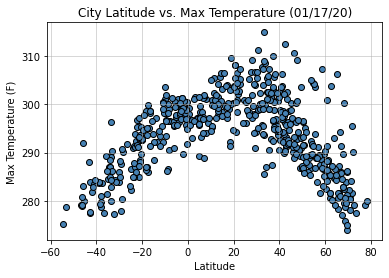

In [7]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

This plot is looking at the relationship between latitude and humidity. It shows that there is not much of a correlation between latitude and humidity.

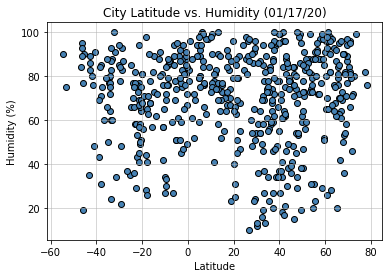

In [8]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

This plot is looking at the relationship between latitude and cloudiness. This also shows that there does not seem to be much of a correlation between latitude and cloudiness.

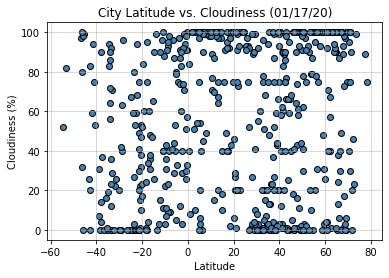

In [9]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

This plot is looking at the relationship between latitude and wind speed. It shows that wind speeds are generally greater the farther away from the equator (latitude 0) you get.

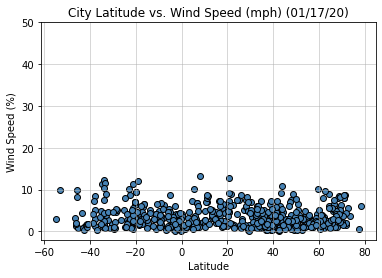

In [10]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] >= 0]
southern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] < 0]

In [12]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a strong negative correlation between latitude and max temperature for the northern hemisphere.

The r-squared is : -0.65


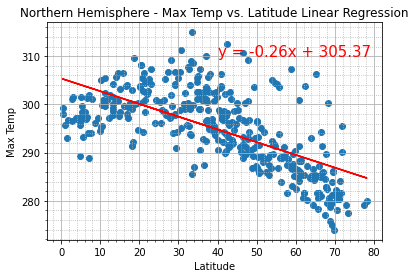

In [13]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 40, 310)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a moderate positive correlation between latitude and max temperature for the southern hemisphere.

The r-squared is : 0.82


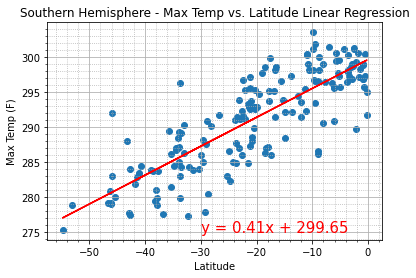

In [14]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 275)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is a weak negative correlation between latitude and humidity for the northern hemisphere.

The r-squared is : -0.01


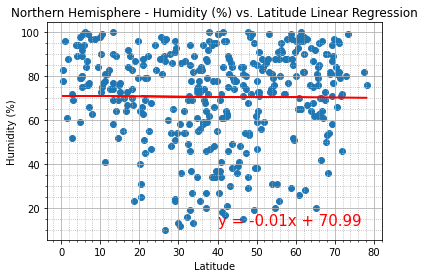

In [15]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 12)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is a weak positive correlation between latitude and humidity for the southern hemisphere.

The r-squared is : -0.01


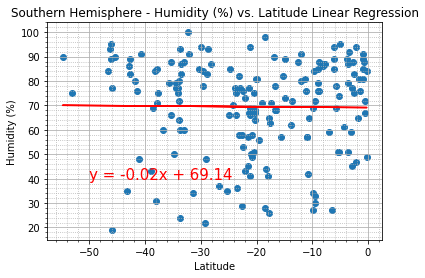

In [16]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -50, 40)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is a weak negative correlation between latitude and cloudiness for the northern hemisphere.

The r-squared is : -0.01


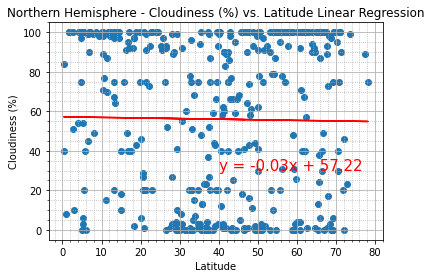

In [17]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 40, 30)
# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is a weak negative correlation between latitude and cloudiness for the southern hemisphere.

The r-squared is : 0.14


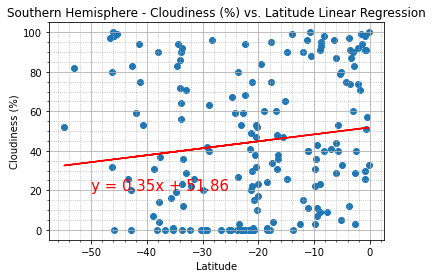

In [18]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -50, 20)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is a weak negative correlation between latitude and windspeed for the northern hemisphere.

The r-squared is : -0.03


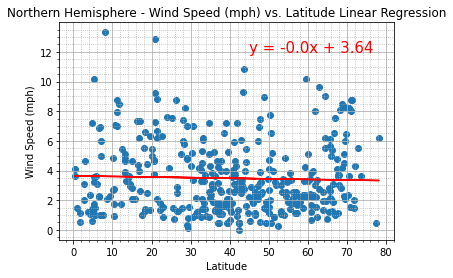

In [19]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 45, 12)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is a weak negative correlation between latitude and wind speed for the southern hemisphere.

The r-squared is : -0.15


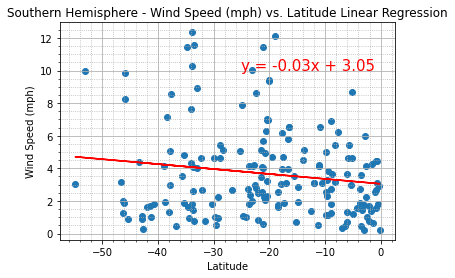

In [20]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -25, 10)

# Set a title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")